## Multiple Linear Regression for Beginners - using Insurance Data p-1


###### This is a simple Linear Regression using insurance data. this is a very basic Multiple Linear Regression for beginners who wants no extra talkative videos but only raw codes and simple explanation with it.      

In [3]:
import pandas as pd
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [4]:
df['sex'] = df['sex'].astype('category')
df['sex'] = df['sex'].cat.codes
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.9,0,yes,southwest,16884.92
1,18,1,33.8,1,no,southeast,1725.55
2,28,1,33.0,3,no,southeast,4449.46
3,33,1,22.7,0,no,northwest,21984.47
4,32,1,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,no,northwest,10600.55
1334,18,0,31.9,0,no,northeast,2205.98
1335,18,0,36.9,0,no,southeast,1629.83
1336,21,0,25.8,0,no,southwest,2007.95


**Note: convert non-numerical values into numerical, here it was sex**

In [5]:
df['smoker'] = df['smoker'].astype('category')
df['smoker'] = df['smoker'].cat.codes

df['region'] = df['region'].astype('category')
df['region'] = df['region'].cat.codes

In [6]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,1,10600.55
1334,18,0,31.9,0,0,0,2205.98
1335,18,0,36.9,0,0,2,1629.83
1336,21,0,25.8,0,0,3,2007.95


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
x = df.drop(columns = 'charges')

In [9]:
x

,age,sex,bmi,children,smoker,region
0,19,0,27.9,0,1,3
1,18,1,33.8,1,0,2
2,28,1,33.0,3,0,2
3,33,1,22.7,0,0,1
4,32,1,28.9,0,0,1
...,...,...,...,...,...,...
1333,50,1,31.0,3,0,1
1334,18,0,31.9,0,0,0
1335,18,0,36.9,0,0,2
1336,21,0,25.8,0,0,3


In [10]:
y = df['charges']

###### Test_Train split

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.4, random_state = 0)

###### Importing Linear Regression 

In [12]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [13]:
lr.fit(x_train, y_train)

LinearRegression()

**Finding C**

In [14]:
c = lr.intercept_
c

-12002.242992927708

**Finding M**

In [15]:
m = lr.coef_
m


array([  259.35367765,    47.10640526,   333.54822137,   533.11955242,
       22934.16657467,  -355.33995281])

*Note: 5 m becuase we are having multiple Ms here*


In [16]:
y_pred_train  = lr.predict(x_train)

In [17]:
y_pred_train

array([ 5.64467812e+03, -1.26944962e+03,  1.48945292e+04,  4.02107808e+03,
        1.03769049e+04,  1.32096260e+04,  1.14417235e+04,  9.28300914e+03,
        1.36948816e+04,  1.03818356e+03,  1.14566848e+04,  9.34936340e+03,
        8.25990978e+03,  1.51430990e+04,  1.25987974e+04,  2.95764930e+04,
        1.74284332e+04,  1.04751935e+04,  9.59583892e+03,  1.29542342e+04,
        5.79923469e+03,  1.59660585e+04,  7.41050331e+03,  5.58469356e+03,
        3.10336719e+04,  1.35708284e+04,  1.28928319e+04,  1.23853296e+04,
        1.27708199e+04,  5.33853386e+03,  2.69337112e+03,  4.10008575e+03,
        5.97975803e+03,  4.18193524e+02,  8.42918613e+03,  7.79425117e+03,
        5.95159660e+03,  1.48594404e+04,  3.95163321e+03,  7.62351275e+03,
        4.92991151e+03,  6.59842177e+02,  6.41107070e+03,  6.18340139e+03,
        3.10099766e+03,  2.98899223e+04,  1.01967035e+04,  1.20992434e+04,
        3.62265933e+04,  5.39743662e+03,  1.40473616e+04,  8.61180810e+02,
        7.15080511e+03,  

Text(0, 0.5, 'Predicted Charges')

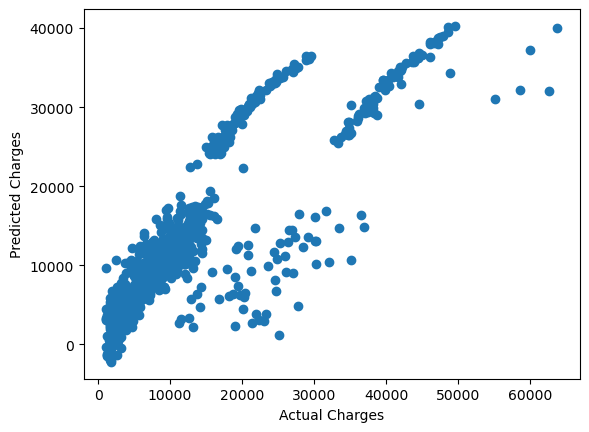

In [27]:
import matplotlib.pyplot as plt
plt.scatter(y_train, y_pred_train)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")



**R2 checking is very important, if the R2 is near to 0 then its a bad model, the more it closer to 
1, the more better model it is**

In [19]:
from sklearn.metrics import r2_score

In [20]:
r2_score(y_train, y_pred_train)

0.7218505416822587

In [21]:
y_pred_test = lr.predict(x_test)

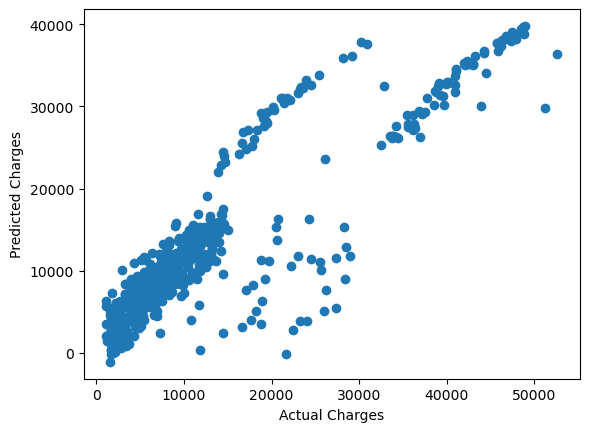

In [22]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred_test)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.show()


In [23]:
r2_score(y_test, y_pred_test)

0.787751932199499

**We can see with the test model R2 is better than train model, means its a good model to run**